In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## Iterate all the rows of a dataframe

In [120]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

# Display the DataFrame
display(df)

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    # Access the 'col1' value for each row
    print(row['col1'])

,col1,col2
0,1,3
1,2,4


1
2


## Import data

`pd.read_csv()`

In [121]:
df = pd.read_csv('example_df.tsv.gz', sep="\t", compression='gzip')
display(df.head(2))

,name,topic,content
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,People,copyright aedan mac gabrain schools wikipedia ...
1,%C3%85land,Geography,copyright aland schools wikipedia selection re...


## Serie methods

`.value_counts()`

In [122]:
value_counts = df['topic'].value_counts()
display(value_counts.head(2))

topic
Science      1105
Geography    1058
Name: count, dtype: int64

`.isin(list_var)`

`.to_numpy()`

## Groupby methods

`.count()`

In [93]:
count = df.groupby('topic').count()
display(count.head(2))

,name,content
topic,,
Art,33,33
Business_Studies,76,76


## Plots from dataframes or series

`.plot()`

<Axes: xlabel='topic'>

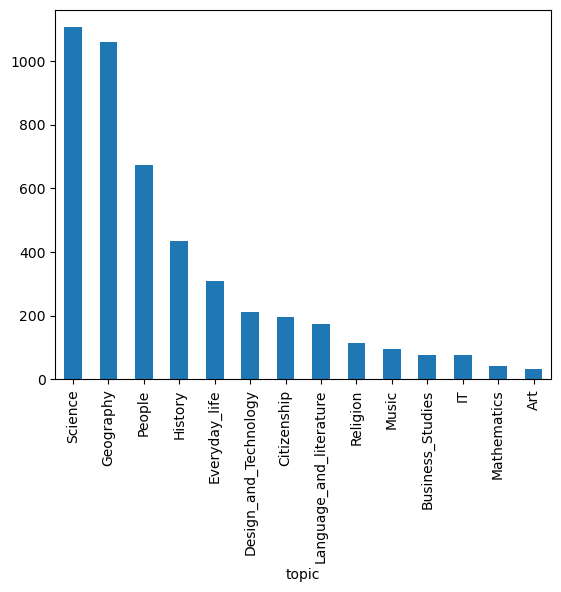

In [94]:
value_counts.plot(kind='bar')

## Ordinal encoding

In [95]:
factor = pd.factorize(df['topic'])
df['labels'] = factor[0] # add a new column containing the labels
definitions = factor[1] # the definitions of each labels

## TF-IDF

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True)
vectorizer = TfidfVectorizer()
X = np.array(vectorizer.fit_transform(df['content']).todense())
terms = vectorizer.get_feature_names_out()

## Split Test and Train data

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['labels'].to_numpy(), test_size=0.3, random_state=42)

## Logistic regression classifier

In [98]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log_loss', max_iter=5, tol=None, alpha=1e-4, random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(loss='log_loss', max_iter=5, random_state=42, tol=None)

In [99]:
# test the modwl with test fraction of the data
y_test_pred = clf.predict(X_test)

In [100]:
# compute accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Data:", accuracy)
print("Accuracy on Test Data: ", np.mean(y_test_pred == y_test))

Accuracy on Test Data: 0.7920289855072464
Accuracy on Test Data:  0.7920289855072464


In a 5-class classification a random model obtains an accuracy of 20% in expectation. Thus, obtaining an accuracy in high 80s is a strong outcome.

## Performance metric

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# When the classes are not balanced (number of counts per class change a lot) uses confusion_matrix or balanced_accuracy_score

## Graphs

In [102]:
import networkx as nx

### Undirected graphs

In [103]:
G = nx.Graph() # for a directed graph use nx.DiGraph()
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges)
print(G)

Graph with 8 nodes and 9 edges


In [123]:
# Helper function for plotting the degree distribution of a Graph
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

In [124]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(G)
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [125]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    # plt.axis('off')

Graph with 8 nodes and 9 edges
Avg. Shortest Path Length: 2.6071
Diameter: 6.0000
Sparsity: 0.3214
Global clustering coefficient aka Transitivity: 0.4615


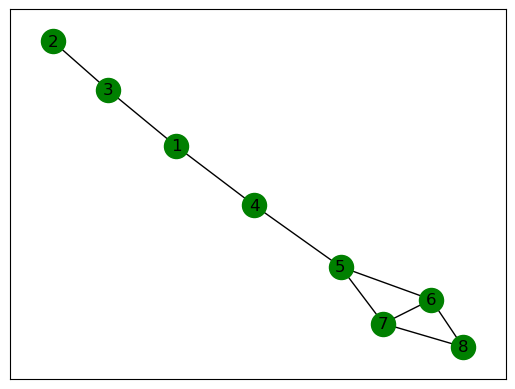

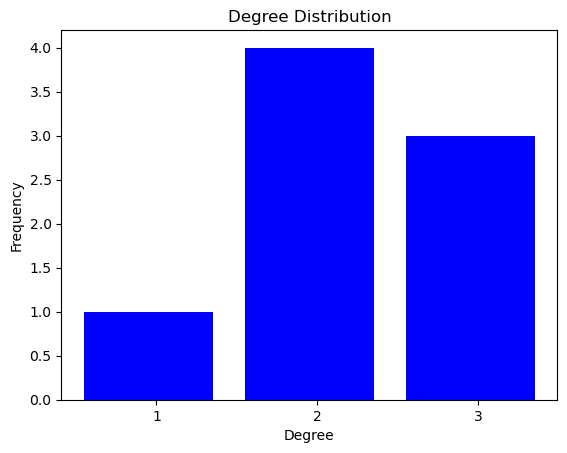

In [126]:
visualize_graph(G)
describe_graph(G)
plot_degree_distribution(G)

### Directed graphs

In [ ]:
edges_data = {'source': [1, 1, 3, 4], 'target': [2, 3, 2, 3]}
edges_df = pd.DataFrame(data=edges_data)
display(edges_df)

edgeList = []; nodes = {}; edges = {}

for index, row in edges_df.iterrows():
    source = row['source']
    target = row['target']
    nodes[source] = True
    nodes[target] = True
    edges[(source, target)] = True
    edgeList.append((source, target))

G = nx.DiGraph()
G.add_edges_from(edgeList)
print(len(G.nodes()), len(G.edges()), len(G.edges())/len(G.nodes()))

nx.draw_spring(G, with_labels=True,  alpha = 0.8)

In [ ]:
in_degree = G.in_degree()
print(f"in_degree = {in_degree}")
nodes = G.nodes()
print(f"nodes = {nodes}")

In [ ]:
in_degree = dict(G.in_degree())
print(f"in_degree.get(1,0) = {in_degree.get(4,0)}")
degseq=[in_degree.get(k,0) for k in nodes]
print(f"degseq = {degseq}")

dmax=max(degseq)+1
print(f"dmax = {dmax}")
freq= [ 0 for d in range(dmax) ]
print(f"freq = {freq}")
for d in degseq:
    freq[d] += 1
print(f"freq = {freq}")

In [ ]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

In [ ]:
print("Weakly connected: ", nx.is_weakly_connected(G))
print(f"There are {len(list(nx.weakly_connected_components(G)))} weakly connected components")
print("Strongly connected: ", nx.is_strongly_connected(G))
print(f"There are {len(list(nx.strongly_connected_components(G)))} strongly connected components")

Average degree is not recommended as the degree distribution of real-world networks usually follows a powerlaw. Summarizing powerlaws with average values is not a good idea, as there is a long tail, and there are many nodes that have very high degree. Instead, median is a better choice.